<a href="https://colab.research.google.com/github/webjjang/data_anal/blob/main/ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import gdown
gdown.download("https://bit.ly/3736JW1", "ns_book6.csv", quiet=False)

Downloading...
From: https://bit.ly/3736JW1
To: /content/ns_book6.csv
100%|██████████| 55.0M/55.0M [00:01<00:00, 43.6MB/s]


'ns_book6.csv'

In [6]:
# 통계처리의 정확성을 위해서 잘못된 데이터의 보정과 필요없는 데이터 제거 선처리해야만 한다.
import pandas as pd
ns_book6 = pd.read_csv("ns_book6.csv", low_memory=False)
ns_book6.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021.0,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021.0,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021.0,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021.0,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021.0,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [7]:
# 데이터프레임의 데이터들에 대해 정리해서 서술해 준다.
# count - 개수, mean - 평균, std - 표준편차, min / max - 최소값 / 최대갑, 25/50/75 - 100을 4등분
ns_book6.describe()

,번호,발행년도,도서권수,대출건수
count,379976.000000,379976.000000,379976.000000,379976.000000
mean,201726.332847,2008.516306,1.135874,11.504629
std,115836.454596,8.780529,0.483343,19.241926
min,1.000000,1947.000000,0.000000,0.000000
25%,102202.750000,2003.000000,1.000000,2.000000
50%,203179.500000,2009.000000,1.000000,6.000000
75%,301630.250000,2015.000000,1.000000,14.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [8]:
sum(ns_book6['도서권수'] == 0)

3206

In [9]:
# 도서권수가 0이 아닌 데이터만 처리
ns_book7 = ns_book6[ns_book6['도서권수'] != 0]

In [11]:
# % - 0.25 / 0.5 / 0.75 이 기본 -> percentiles=[] 로 변경할 수 있다.
ns_book7.describe(percentiles=[0.3, 0.6, 0.9])

,번호,발행년도,도서권수,대출건수
count,376770.000000,376770.000000,376770.000000,376770.000000
mean,202977.476649,2008.460076,1.145540,11.593439
std,115298.245784,8.773148,0.473853,19.279409
min,1.000000,1947.000000,1.000000,0.000000
30%,124649.700000,2004.000000,1.000000,2.000000
50%,204550.500000,2009.000000,1.000000,6.000000
60%,243537.400000,2011.000000,1.000000,8.000000
90%,361341.100000,2018.000000,2.000000,28.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [12]:
# object - 실제적인 데이터
# freq : 빈도수
ns_book7.describe(include="object")

,도서명,저자,출판사,ISBN,세트 ISBN,부가기호,권,주제분류번호,등록일자
count,376770,376770,376770,376770,55866,308252,61793,359792,376770
unique,336408,248850,21875,350810,14875,17,834,12467,4562
top,승정원일기,세종대왕기념사업회 [편],문학동네,9788937430299,9788937460005,0,1,813.6,1970-01-01
freq,250,303,4410,206,702,158235,13282,14816,28185


In [13]:
# 평균 구하기
x = [10, 20, 30] # x1, x2, x3
sum = 0
for i in range(len(x)):
    sum += x[i]
print(f"합계 = {sum}, 평균 = {sum / len(x)}")

합계 = 60, 평균 = 20.0


In [15]:
ns_book7.describe()

,번호,발행년도,도서권수,대출건수
count,376770.000000,376770.000000,376770.000000,376770.000000
mean,202977.476649,2008.460076,1.145540,11.593439
std,115298.245784,8.773148,0.473853,19.279409
min,1.000000,1947.000000,1.000000,0.000000
25%,104488.250000,2003.000000,1.000000,2.000000
50%,204550.500000,2009.000000,1.000000,6.000000
75%,302346.750000,2015.000000,1.000000,14.000000
max,401681.000000,2650.000000,40.000000,1765.000000


In [14]:
# 평균 구하기
ns_book7["대출건수"].mean()

np.float64(11.593438968070707)

In [16]:
# 중앙값 구하기 - 위치가 50%에 있는 데이터
ns_book7["대출건수"].median()

6.0

In [18]:
# 데이터의 개수가 홀수면 중앙의 값이 한개로 정해진다.
# 데이터의 개수가 짝수면 중앙에 위치한 2개의 숫자를 더해서 평균을 내준다.
temp_df = pd.DataFrame([1, 2, 5, 10])
temp_df.median()

,0
0,3.5


In [19]:
# 중복된 값을 제거하고 중앙값 구하기
ns_book7["대출건수"].drop_duplicates().median()

183.0

In [22]:
# 최소값과 최대값
print(ns_book7["대출건수"].min())
print(ns_book7["대출건수"].max())

0
1765


In [27]:
# 분위수 구하기 : 0(0%) ~ 1(100%)
# .quantile() - 50%의 데이터를 구한다.
# ns_book7["대출건수"].quantile()
# quantile - 변위치 : 변하는 위치
ns_book7["대출건수"].quantile(0.25)


np.float64(2.0)

In [29]:
# 여러 분위의 수 구하기
ns_book7["대출건수"].quantile([0, 0.25, 0.5, 0.75, 1])

,대출건수
0.00,0.0
0.25,2.0
0.50,6.0
0.75,14.0
1.00,1765.0


In [32]:
# 분산구하기 - 평균에서 떨어진 정도의 숫자 - 10 * 10 -> 분산 / 10 -> 표준 편차
# 분산 : Variance​var , 표준편차 : standard deviation
# ns_book7['대출건수'].var()
print(ns_book7['대출건수'].mean())
print(ns_book7['대출건수'].std())

11.593438968070707
19.27940949382766


In [35]:
# 최빈값 - 최대로 많이 나타나는 값
ns_book7['대출건수'].mode()
#ns_book7['도서명'].mode()
# ns_book7['발행년도'].mode()

,대출건수
0,0


In [36]:
# 숫자에 해당되는 항목의 평균 구하기
ns_book7.mean(numeric_only=True)

,0
번호,202977.476649
발행년도,2008.460076
도서권수,1.145540
대출건수,11.593439


In [37]:
# 최빈수에 해당되는 데이터 가져오기
ns_book7.loc[:, "도서명":].mode()

,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,승정원일기,세종대왕기념사업회 [편],문학동네,2012.0,9788937430299,9788937460005,0,1,813.6,1,0,1970-01-01


In [39]:
import numpy as np
np.mean(ns_book7["대출건수"])

np.float64(11.593438968070707)

In [40]:
# 가중치 적용 - 예를 들어 대출건수 10, 도서권서 10 - 1권 1번 대출, 대출건서 10, 도서권1 - 10번 대출
np.average(ns_book7['대출건수'], weights=1/ns_book7['도서권수'])

np.float64(10.543612175385386)

In [41]:
# 예를 들어 대출건수 10, 도서권서 10 - 1권 1번 대출, 대출건서 10, 도서권1 - 10번 대출
np.mean(ns_book7["대출건수"]/ns_book7["도서권수"])

np.float64(9.873029861445774)

In [42]:
# df의 전체 갯수로 평균 구하기
ns_book7["대출건수"].sum() / ns_book7["도서권수"].sum()

np.float64(10.120503701300958)

In [43]:
# numpy를 이용한 중위값
np.median(ns_book7["대출건수"])

np.float64(6.0)

In [51]:
# 최소값 / 최대값
print("최소값=" + str(np.min(ns_book7["대출건수"])))
print("최대값=" + str(np.max(ns_book7["대출건수"])))

최소값=0
최대값=1765


In [52]:
# 분위수 구하기 - 4분위
np.quantile(ns_book7["대출건수"], [0.25, 0.5, 0.75])

array([ 2.,  6., 14.])

In [53]:
# 분산
# 분산 : Variance​var , 표준편차 : standard deviation
np.var(ns_book7["대출건수"])

371.694643898775

In [60]:
# 표준 편차
values, counts = np.unique(ns_book7["도서명"], return_counts=True)
print(values)
print(counts)

[' (꼭 필요한 것부터 쉽게 배우는) 자신만만 블로그 차근차근 배우기 ' ' (맨처음 배우는) 세상의 직업'
 ' (영잘원 리스닝과 패턴 영어의 절묘한 만남으로 태어난 ) 리스닝 ABC : 입문편 ' ... '＋α를 위한 도전'
 '＠좌절＋열공 :우리 시대 멘토 9인이 전하는 좌절 극복과 진짜 공부 이야기 ' 'ｉ']
[1 1 1 ... 1 1 1]


In [61]:
max_idx = np.argmax(counts)
print(max_idx)

205707


In [62]:
values[max_idx]

'승정원일기'

In [64]:
# 그래프 그리는 라이브러리 - matplotlib
# 데이터 - ns_book7
import gdown
gdown.download("https://bit.ly/3pK7iuu","ns_book7.csv",quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 243MB/s]


'ns_book7.csv'

In [66]:
import pandas as pd
ns_book7 = pd.read_csv("ns_book7.csv", low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [67]:
# matplotlib 사용해보기
import matplotlib.pyplot as plt

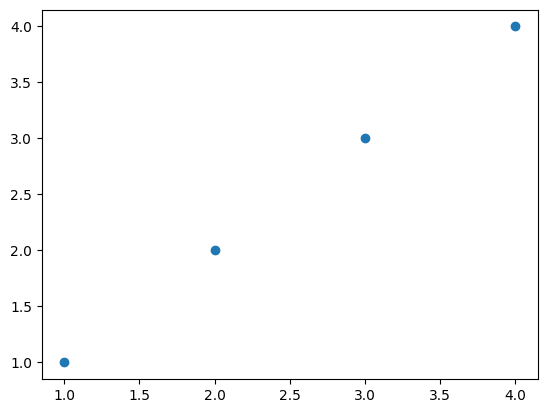

In [74]:
# matplotlib 의 데이터 세팅
plt.scatter([1,2,3,4],[1,2,3,4])
# matplotlib의 그래프를 이미지로 저장하자.
plt.savefig("scatter.png")
# 세팅한 그래프 보여주기
plt.show()

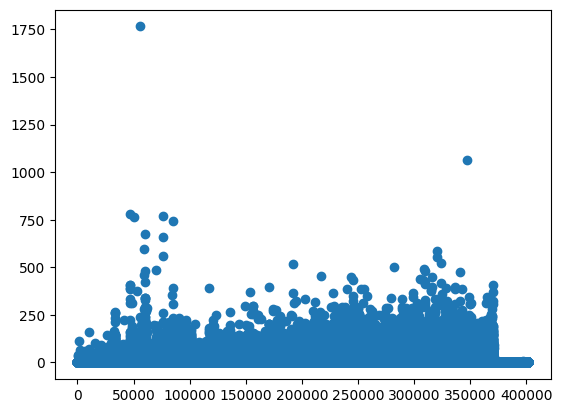

In [76]:
# 산점도 그래프 타입 선택 - scatter(x축의 데이터, y축의 데이터)
plt.scatter(ns_book7["번호"], ns_book7["대출건수"])
plt.show()

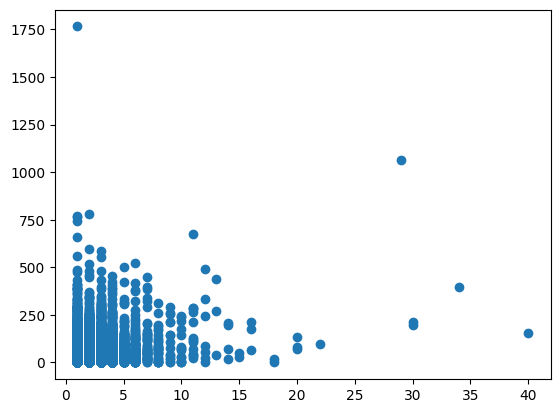

In [77]:
# 산점도 그래프 타입 선택 - scatter(x축의 데이터, y축의 데이터)
plt.scatter(ns_book7["도서권수"], ns_book7["대출건수"])
plt.show()

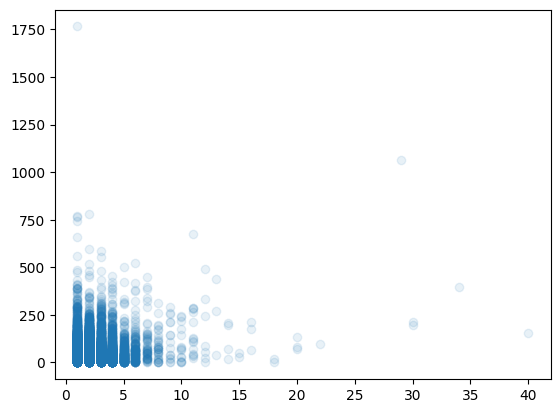

In [80]:
# 산점도 그래프 타입 선택 - scatter(x축의 데이터, y축의 데이터)
# 같은 곳에 여러개의 데이터가 표시 한개인 것 처럼 표시 -> 투명도 조정 표시
# alpha=0.1 : 0 - 완전투명, 1 - 완전 불투명, 0.1 * 10 = 1 : 10개를 표시하면 완전불투명
plt.scatter(ns_book7["도서권수"], ns_book7["대출건수"], alpha=0.1)
plt.show()

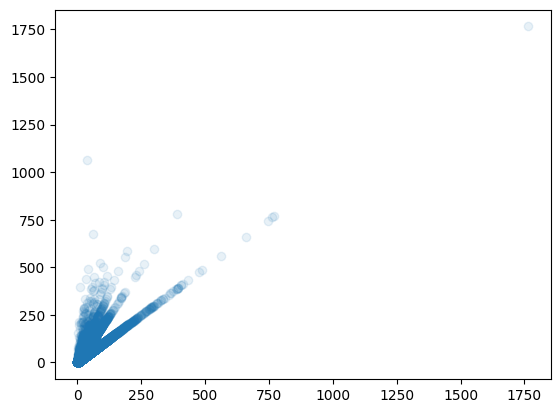

In [81]:
# 도서권수당 대출 건수 - 데이터 조정이 있다.
average_borros = ns_book7['대출건수']/ns_book7['도서권수']
plt.scatter(average_borros, ns_book7['대출건수'], alpha=0.1)
plt.show()

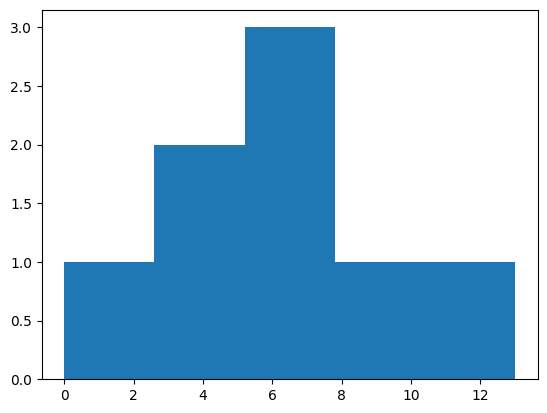

In [85]:
# 막대그래프 = 히스토그램
# 0 ~ 13을 정확하기 5등분해서 등분한 한개 안에 존재하는 데어터의 갯수
plt.hist([0,3,5,6,7,7,9,13], bins=5)
plt.show()

In [87]:
# numpy를 이용한 구간(bin)의 경계선 값을 알아내 보자.
import numpy as np
np.histogram_bin_edges([0,3,5,6,7,7,9,13], bins=5)

array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. ])

In [94]:
# 랜덤 데이터 만들기
# 램덤 - 표준 정규 분포 데이터를 만들자 - randn()
np.random.seed(42)
random_samples = np.random.randn(1000)

In [89]:
print(np.mean(random_samples), np.std(random_samples))

0.01933205582232549 0.9787262077473543


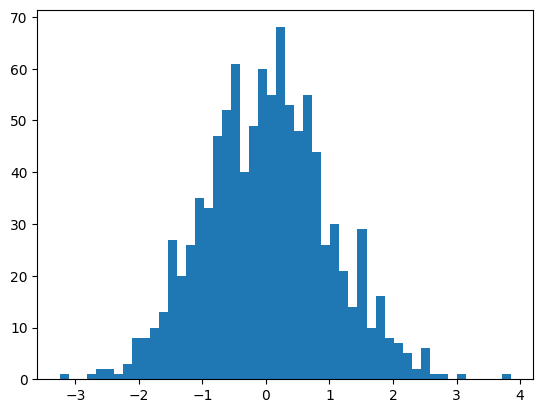

In [96]:
plt.hist(random_samples, bins=50)
plt.show()